# end-to-end multi class classification of dog breed 

This notebook builds end-to-end multiclass classifier using tensorflow 2.0 and tensorflow hub.

## 1. Problem

To identify an breed of an dog from image of an dog.
When I am sitting in the cafe and I take photo of dog, I want to know which breed of dog it is.

## 2. Data

The data is used from kaggle dog breed identification completition.

https://www.kaggle.com/competitions/dog-breed-identification

## 3. Evaluation

The evaluation is a file for prediction probabilities for each dog images of each test images.

## 4. Features

Some information about data:
* We are dealing with images(Unstructured data) So, it's probably best to use Deep learning/ Transfer learning
* There are 120 breeds of dogs(This means there are 120 different classes).
* There are 10,000 + images in training sets( These images have lebels)
* There are 10, 000+ images in test sets.


In [ ]:
# unzip the date into google drive
#!unzip "drive/MyDrive/Dog Vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog Vision"

## Getting our workspace ready

* import tensorflow 2.x ✅
* import tensorflow hub ✅
* make sure we're using GPU ✅

In [ ]:
# importing tensorflow into colab
import tensorflow as tf
# import tensorflow hub
import tensorflow_hub as hub
print("tf version: ", tf.__version__)
print(" tf hub version:", hub.__version__)
# check for GPU availability
print("GPU", "available (Yes !! )" if tf.config.list_physical_devices("GPU") else ("not"))

tf version:  2.9.2
 tf hub version: 0.12.0
GPU available (Yes !! )


# Getting our data ready (Turning into tensor)
 With all machine learning model our data has to be in numerical format. So, that's what we will be doing first. Changing image 
into tensors(numerical representations)

Let's start by accessing our data and checking with labels

In [ ]:
# checking out the lebels
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [ ]:
labels_csv["breed"].value_counts().median()

82.0

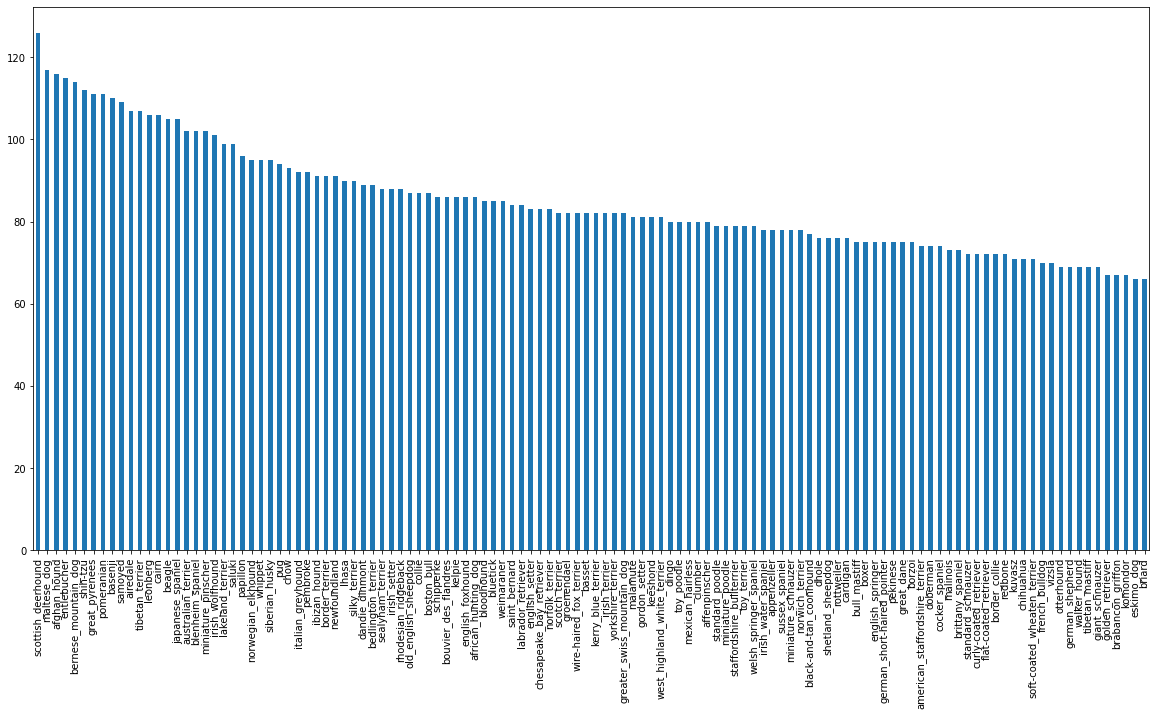

In [ ]:
labels_csv["breed"].value_counts().plot.bar(figsize = (20, 10))

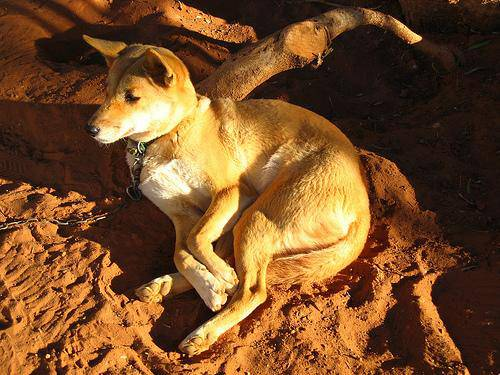

In [ ]:
# view an image
from IPython.display import Image
Image("drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

## Getting images into labels

let's list the images of breed into pathnames

In [ ]:
filename = [fname for fname in labels_csv["id"]]
filename[:10]

['000bec180eb18c7604dcecc8fe0dba07',
 '001513dfcb2ffafc82cccf4d8bbaba97',
 '001cdf01b096e06d78e9e5112d419397',
 '00214f311d5d2247d5dfe4fe24b2303d',
 '0021f9ceb3235effd7fcde7f7538ed62',
 '002211c81b498ef88e1b40b9abf84e1d',
 '00290d3e1fdd27226ba27a8ce248ce85',
 '002a283a315af96eaea0e28e7163b21b',
 '003df8b8a8b05244b1d920bb6cf451f9',
 '0042188c895a2f14ef64a918ed9c7b64']

In [ ]:
filename = ["drive/MyDrive/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]
filename[:10]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog Vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog Vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog Vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog Vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog Vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog Vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog Vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

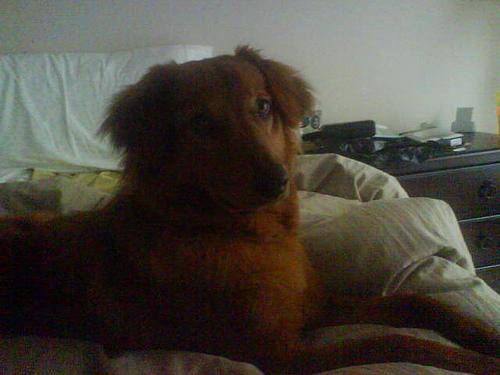

In [ ]:
Image(filename[1000])

In [ ]:
# Checking the list of filenames with training dataset
import os
if (len(os.listdir("drive/MyDrive/Dog Vision/train")) == len(filename)):
  print("length of filenames and training images matches, let's proceed")
else:
  print("lenght of filename and training images do not match, take a look")

length of filenames and training images matches, let's proceed


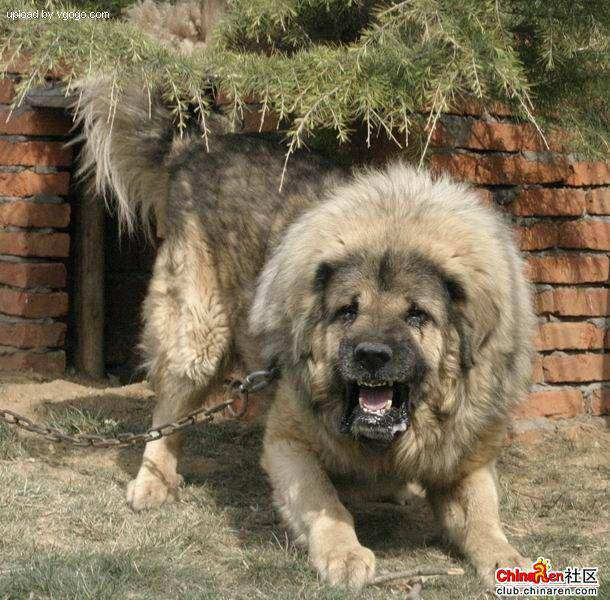

In [ ]:
Image(filename[9000])

In [ ]:
labels_csv["breed"][9000]

'tibetan_mastiff'

Since we've got our training images into filepath, we now work with labels.

In [ ]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
#labels = np.array(labels) # does same as above statement
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# check if number of labels matches number of filenames
if len(labels) == len(filename):
  print("number of labels matches number of filename")
else:
  print("number of labels doesn't matches number of fi")

number of labels matches number of filename


In [ ]:
# find a unique breed
unique_breed = np.unique(labels)
len(unique_breed)

120

In [ ]:
# check single labels in the array of boolean
print(labels[0])

boston_bull


In [ ]:
labels_csv.head(1)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull


In [ ]:
unique_breed[19]

'boston_bull'

In [ ]:
labels[0] == unique_breed

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turning all the labels into array of boolean
boolean_labels = [label == unique_breed for label in labels]
boolean_labels[:4]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
boolean_labels[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turning all boolean labels into number
print(labels[0])
print(np.where(unique_breed == labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filename[:3]

['drive/MyDrive/Dog Vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog Vision/train/001cdf01b096e06d78e9e5112d419397.jpg']

## Creating our validation set
Since there is no validation set on kaggle, we will make our own.

In [ ]:
# Creating our variables x and y for filename and boolean_labels
x = filename
y = boolean_labels

We will work with 1000 images for experiments and increase as needed


In [ ]:
# Set number of image for experimenting
NUM_IMAGES = 1000 #@param {type: slider, min:1000, max:10000, step: 1000}

In [ ]:
# let's split our dataset into train and validation set
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_val,y_train, y_val = train_test_split(x[:NUM_IMAGES], y[:NUM_IMAGES], test_size = 0.2, random_state = 42)

In [ ]:
len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [ ]:
x_train[:3], y_train[:2]

(['drive/MyDrive/Dog Vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog Vision/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Dog Vision/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fa

# Preprocessing images( turning images into tensors)

## To preprocess the image into tensors we are using function which does following things:

1. Take an image filepath as input
2. Use tensorflow to read the image and save it to a variable `images`
3. Turn our images (.jpg) into tensors
4. Normalize the image ( convert the image channels from 0-255 to 0-1)
5. Resize the image to be a shape of (224, 224)
6. Return the modified images


## Before we do let see how importing an image looks like

In [ ]:
# convert image into numpy array
from matplotlib.pyplot import imread
image = imread(filename[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(), image.min()

(255, 0)

In [ ]:
# changing image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [ ]:
# Define image size
IMG_SIZE = 224

# Create the function for preprocessing images
def process_image(image_path, img_size = IMG_SIZE):
  """
  Take an image file path and convert it into tensors
  """
  # Read in an image file 
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical tensor with 3 channel color (red green blue)
  image = tf.image.decode_jpeg(image, channels = 3)  
  # normolize the image( chaning the image channels from 0-255 to 0-1)
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image into desired value ( 255,255)
  image = tf.image.resize(image, size = [img_size, img_size])

  return image

## Turning our data into batches

Why turn our data into batches?

Let's say you are trying to process 10000+ images in one go...they all might not fit in the memory.

That's why we do 32(batch size) images in one time( you can adjust batch size manually as needed)

* In order to use tensorflow effectively, we need our data in the form of tensor tuples which look like this `(images, labels)`

In [ ]:
# Create a function to return a tuple
def get_image_label(image_path, label):
  """
  Takes an image filepath name and associated label 
  process the imaage and return tuple (image, label)
  """
  image = process_image(image_path)
  return image, label

In [ ]:
# Demo of above
(process_image(x[48]), tf.constant(y[48]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.35963878, 0.20669761, 0.08512897],
         [0.373617  , 0.2206758 , 0.09910716],
         [0.29833686, 0.14539567, 0.02382704],
         ...,
         [0.16883636, 0.03158145, 0.01589518],
         [0.18883058, 0.03137255, 0.02352941],
         [0.19215688, 0.03137255, 0.02352941]],
 
        [[0.31972867, 0.16678749, 0.04521887],
         [0.3940893 , 0.24114813, 0.11957949],
         [0.31872377, 0.16578259, 0.04421394],
         ...,
         [0.16497724, 0.02772232, 0.01203605],
         [0.18486524, 0.02740721, 0.01956408],
         [0.18819155, 0.02740721, 0.01956408]],
 
        [[0.28392163, 0.13098045, 0.01250703],
         [0.41450801, 0.26156682, 0.1399982 ],
         [0.3334764 , 0.1805352 , 0.05896657],
         ...,
         [0.15841211, 0.0211572 , 0.00547092],
         [0.17830011, 0.02084209, 0.01299895],
         [0.18162641, 0.02084209, 0.01299895]],
 
        ...,
 
        [[0.9144971 , 0.8298094 

We have turned our data into tuples of tensors (image, label). Now, l

In [ ]:
# Define the batch size , 32 fits good
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches( x, y = None, batch_size = BATCH_SIZE,valid_data = False, test_data = False):
  """
  Create batches of data out of images (x) and labels(y) pairs.
  shuffle the data if it is training data but don't shuffle if it is validation data
  also accept test data as input(no lables)
  """
  # if the test data is input we probably don't have labels
  if test_data:
    print("creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x)))
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is valid dataset we don't need to shuffle it
  elif valid_data:
    print("Creating valid data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  # if data is training dataset we need to shuffle it
  else:
    print("creating training data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    # shuffle pathname and labels before mapping
    data = data.shuffle(buffer_size = len(x))
    data = data.map(get_image_label)
    data_batch = data.batch(BATCH_SIZE)
    return data_batch
  

In [ ]:
# creating training and validation data batch
train_data = create_data_batches(x_train, y_train)
valid_data = create_data_batches(x_val, y_val, valid_data = True)

creating training data batches...
Creating valid data batches...


In [ ]:
# Check out the different attributes of datasets
train_data.element_spec, valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is in batches. It's difficult to understand/comphrend. Let's
visualize them.

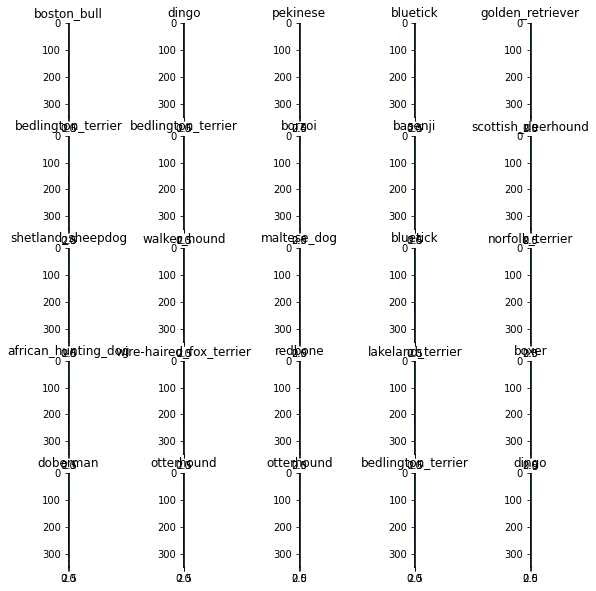

In [ ]:
import matplotlib.pyplot as plt

# Create a function to visualize the data batches
def show_24_images(image, labels):
  """
 
  Display a plot of 25 images and their labels from data batches
  """
# set up the figure
plt.figure(figsize=(10, 10))
# loop through 25 ( displaying 25 images)
for i in range(25):
  ax = plt.subplot(5, 5, i+1)
# Display an image
  plt.imshow(image[i])
# add labels as title
  plt.title(unique_breed[boolean_labels[i].argmax()])
# Turn the grid line off
 # plt.axis("off")

In [ ]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[0.34807152, 0.5800393 , 0.27379358],
          [0.376759  , 0.6087268 , 0.3073571 ],
          [0.37308082, 0.6031666 , 0.31409973],
          ...,
          [0.41501296, 0.6228561 , 0.4110914 ],
          [0.42636073, 0.63420385, 0.42243916],
          [0.44217876, 0.65002185, 0.4382572 ]],
 
         [[0.3762227 , 0.57587254, 0.32405183],
          [0.34693682, 0.5464153 , 0.29702437],
          [0.28869408, 0.4877487 , 0.24841602],
          ...,
          [0.421554  , 0.61097974, 0.40646297],
          [0.4433897 , 0.6328155 , 0.42829868],
          [0.44126356, 0.6306893 , 0.42617252]],
 
         [[0.451543  , 0.60385394, 0.42143098],
          [0.35979816, 0.5121091 , 0.33176303],
          [0.32553843, 0.4831929 , 0.30625203],
          ...,
          [0.4744764 , 0.64231604, 0.44450685],
          [0.48046893, 0.65012914, 0.4514828 ],
          [0.4651348 , 0.62996316, 0.43353862]],
 
         ...,
 
         [[0.82845914, 0.76963556, 0.7814003 ],
          [0.92555

In [ ]:
# Now let's visualize the training dataset in training images
show_24_images(train_images, train_labels)

## Building a model

* The input shape ( our imge shape, in the form of tensor) to our model.
* The output shape (image labels, in the form of tensor) to our model.
* The url of the model we use from tensorflow hub


In [ ]:
# setup input shape to the model
INPUT_SHAPE = (None, IMG_SIZE, IMG_SIZE, 3) # batch, height, weight, color channel
# Set up output shape to the model
OUTPUT_SHAPE = len(unique_breed)
# Set up model url using tesnorflow hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"


Now, we have got our input, output and model ready to go.
Let's put them toghether into the keras deep learning model!

Let's create a function which:
* takes input shape, output shape and model we have chosen as parameters.
* Defines the layers in keras model in sequential fashion( do this first, then that, then that).
* Compile the model( says it should be evaluated and improved).
* Build the model( tell the model the input shape it will be getting).
* Returns the model.

All these steps can be found here: https://www.tensorflow.org/guide/keras/sequential_model

In [ ]:
#create a function which build a keras model
def create_model(input_shape= INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print("building model with", MODEL_URL)

  #setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(model_url),
      tf.keras.layers.Dense(units = output_shape, activation = "softmax")

  ])

  # compile the model
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ["accuracy"]
  )

  # build the model
  model.build(INPUT_SHAPE)

  return model


In [ ]:
model = create_model()
model.summary()

building model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

Callbacks are helper functions a model can use during training to do such things as saves its progress, check its progress and stops training early if a model stops improving.


We'll create two callbacks, TensorBoard which helpt to track our model progress and another for early stopping which helps our model for training for too long.

### TensorBoard callbacks

To setup tensorboard callback, we need to do 3 things:
1. load the TensorBoard notebook extension
2. Create a TensorBoard callbacks that is used to save logs to a directory and pass it a model's `fit()` functions.
3. Visualize our training model logs with `%TensorBoard` magic function( we'll do this after model training)


In [ ]:
# load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# create a function to make  a tensorboard callback
def create_tensorboard_callback():
  # create a tensorboard log directory to store tensorboard logs
  logdir = os.path.join("drive/MyDrive/Dog Vision/logs", 
                        datetime.datetime.now().strftime("%y%m%d-%h%m%s"))
  
  return tf.keras.callbacks.TensorBoard(logdir)


## Early stopping callbacks

Early stopping callbacks help stop our model from overfitting by stopping training if a certain evaluation metrics stops.

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", patience=3)

## Training a model

Our first model is going to train on 100 images only, to make sure everything is working

In [ ]:
NUM_EPOCHS = 100 #@param {type: 'slider', min: 10, max: 100, step: 10}

In [ ]:
from tensorflow.python.framework.config import list_physical_devices
# check to make sure we are still working on gpu
print("GPU", "available (yes)" if tf.config.list_physical_devices('GPU') else "not available")

GPU available (yes)


## Let's create a function which trains a model

* create a model using `create_model()`.
* setup tensorboard callback using `create_tensorboard_callback()`.
* call the `fit()` function n our model passing it the training data, validation data , number of epochs to train for (NUM_EPOCHS) and the callback we are going to use.
* Return the model

In [ ]:
# define a function to train and return the trained model
def train_model():
  """
  Train a given model and returns the trained version(model).
  """
  #create a model
  model = create_model()

  # create a tensorboard session everytime we train model
  tensorboard = create_tensorboard_callback()

  # fit the model to the data passing it the callbacks we created
  model.fit(x = train_data,
            epochs = NUM_EPOCHS,
            validation_data = valid_data,
            validation_freq = 1,
            callbacks = [tensorboard, early_stopping])
  # return the fitted model
  return model
  

In [ ]:
# fit the model to the data
model = train_model()

building model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 145s 5s/step - loss: 4.6632 - accuracy: 0.1063 - val_loss: 3.6874 - val_accuracy: 0.2000
Epoch 2/100
25/25 [==============================] - 3s 119ms/step - loss: 1.7267 - accuracy: 0.6675 - val_loss: 2.3635 - val_accuracy: 0.4600
Epoch 3/100
25/25 [==============================] - 4s 151ms/step - loss: 0.5956 - accuracy: 0.9300 - val_loss: 1.8420 - val_accuracy: 0.5250
Epoch 4/100
25/25 [==============================] - 3s 121ms/step - loss: 0.2691 - accuracy: 0.9812 - val_loss: 1.6024 - val_accuracy: 0.5650
Epoch 5/100
25/25 [==============================] - 3s 117ms/step - loss: 0.1542 - accuracy: 0.9975 - val_loss: 1.5097 - val_accuracy: 0.6100
Epoch 6/100
25/25 [==============================] - 4s 148ms/step - loss: 0.1034 - accuracy: 0.9987 - val_loss: 1.4643 - val_accuracy: 0.6200
Epoch 7/100
25/25 [==============================] 

NOte: overfitting to begin with is good thing, it means our model is learning.

### Checking the TensorBoard logs

The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and visualiize its contents.

In [ ]:
%tensorboard --logdir /drive/MyDrive/Dog\ Vision/logs

<IPython.core.display.Javascript object>

### making and evaluating prediction using trained model

In [ ]:
# Make prediction on validation data (not used to train on)
prediction = model.predict(valid_data, verbose = 1)
prediction

7/7 [==============================] - 4s 89ms/step


array([[1.7005898e-03, 2.3649233e-04, 1.3095464e-03, ..., 1.4793561e-04,
        1.1473969e-04, 3.5890981e-04],
       [1.1435923e-03, 9.9768536e-04, 1.2771041e-03, ..., 2.6100458e-04,
        3.0950387e-03, 1.5348871e-04],
       [2.6957296e-05, 1.6918995e-04, 2.4326694e-04, ..., 1.7503131e-05,
        5.1645882e-04, 4.8180320e-04],
       ...,
       [8.5362109e-07, 1.4318380e-05, 2.1411597e-05, ..., 2.2454346e-06,
        6.6012326e-05, 1.3502320e-05],
       [1.0034953e-03, 2.9351443e-04, 6.3219886e-05, ..., 7.4639283e-05,
        3.2522008e-04, 1.2312774e-02],
       [2.6736085e-04, 1.4797864e-05, 4.2157949e-04, ..., 1.3076160e-02,
        2.5130389e-03, 5.7139365e-05]], dtype=float32)

In [ ]:
np.sum(prediction[0])

1.0

In [ ]:
# first prediction
print(prediction[1])
print(f"Max value (probability of prediction): {np.max(prediction[1])}")
print(f"sum: {np.sum(prediction[1])}")
print(f"max index:{np.argmax(prediction[1])} ")
print(f"predicted label: {unique_breed[np.argmax(prediction[1])]} ")

[1.14359229e-03 9.97685362e-04 1.27710414e-03 7.73840467e-04
 9.92362257e-05 9.44211642e-05 2.96969153e-03 5.50841738e-04
 6.53976109e-04 3.03753652e-04 3.03193636e-04 7.83118230e-06
 6.10327523e-04 2.12269915e-05 3.37538688e-04 7.33373279e-04
 1.15299306e-03 1.79224997e-04 4.71602943e-05 7.96132445e-05
 3.10120027e-04 2.63855891e-05 8.37142397e-06 3.19173741e-05
 5.84737645e-05 1.26572224e-04 5.05768470e-02 2.20338278e-03
 4.16924231e-05 1.95126253e-04 2.02632436e-05 1.02692647e-05
 4.10518376e-04 1.28495521e-05 5.11847902e-05 6.32831870e-05
 2.53526669e-04 1.05382188e-03 3.16636761e-05 1.46816765e-05
 3.58027231e-04 1.46468316e-04 2.03378968e-05 4.04951395e-04
 2.16319948e-03 1.19429850e-03 5.92251075e-04 9.36420620e-05
 2.09104083e-02 7.99522822e-05 5.16181753e-05 6.78109005e-04
 3.36357734e-05 1.59527444e-05 2.17777997e-04 9.95535403e-04
 9.69447283e-05 2.58117844e-03 4.47075261e-04 1.52483080e-02
 1.83210286e-04 1.98932253e-06 6.19697857e-06 2.93551057e-05
 1.14742178e-03 5.851401

Having the above functionality is great but we want to be able to do it in scale!.
And it would be even better if we could see the image the prediction is being made on!

*note*: prediction probabilites are also known as confidence level.

In [ ]:
# Turing prediction probabilites into their respective labels
def get_pred_label(prediction_probabilities):
  """
  Turn array of prediction probabiliites into the labels
  """
  return unique_breed[np.argmax(prediction_probabilities)]

# get prediction labels based on array of prediction probabilities
pred_label =  get_pred_label(prediction[0])
pred_label

'border_terrier'

In [ ]:
valid_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

Now since our valid data is in batch format we will have to unbatchyfy it to make predictions on the validation images and then compare those predictions to the validation labels(truth labels)

In [ ]:
#create a function to unbatch a batch dataset
def unbatchify(data):
  """
  Takes a batch dataset (images, labels)tensors and return separate arrays of images and labels.
  """
  images_ = []
  labels_ = []
  #loop through unbatch data
  for image, label in data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(unique_breed[np.argmax(label)])
  return images_, labels_





In [ ]:
# unbatchify the validation data 
val_images, val_labels = unbatchify(valid_data)
val_images[1], val_labels[1]

(array([[[0.96018916, 0.97587544, 0.979797  ],
         [0.9617217 , 0.977408  , 0.98132956],
         [0.9651424 , 0.9808287 , 0.9847503 ],
         ...,
         [0.95294124, 0.9725491 , 0.9960785 ],
         [0.94906336, 0.9686712 , 0.9922006 ],
         [0.94802153, 0.9676294 , 0.9911588 ]],
 
        [[0.97587544, 0.9915617 , 0.9954833 ],
         [0.9765078 , 0.99219406, 0.9961156 ],
         [0.9802049 , 0.99589115, 0.99981266],
         ...,
         [0.96018916, 0.979797  , 1.        ],
         [0.9563113 , 0.9759191 , 0.9994114 ],
         [0.95366776, 0.9732756 , 0.99680495]],
 
        [[0.9686275 , 0.9843138 , 0.98823535],
         [0.9689829 , 0.98466915, 0.9885907 ],
         [0.972765  , 0.9884513 , 0.9923729 ],
         ...,
         [0.9677083 , 0.98731613, 1.        ],
         [0.9650211 , 0.9846289 , 1.        ],
         [0.9610995 , 0.98070735, 0.9960785 ]],
 
        ...,
 
        [[0.29487073, 0.40404442, 0.24774945],
         [0.13160652, 0.22889124, 0.11186

## Now we've get ways to get:

* prediction labels
* validation labels(truth labels)
* validation images

let's make function to make it a bit more visualize.

We'll create a function which:
* takes an array of prediction probabilities, array of truth labels and an array of images and integers
* convert the prediction probabilities into prediction labels
* Plot the predicted label, its predicted probability , the truth label and the target image on a single plot.

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n=77):
  """
  view the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # Get the pred label
  pred_label = get_pred_label(pred_prob)

  # plt images and remote ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # changing the color of the title depending if the label is predicted or not
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label, np.max(pred_prob)*100, true_label), color=color)

   

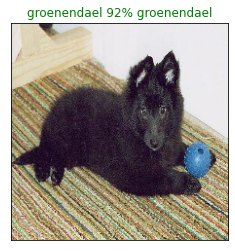

In [ ]:
plot_pred(prediction_probabilities = prediction, labels = val_labels, images= val_images)

Now we've got the function to visualize our models top prediction, let's make another to view our models top 10 predictions.

This function will:
* Take an inpurt of prediction array and a ground truth array and an integer.
* Fubd the prediction using get_pred_label().
* Find the top 10:
  - Prediction probabilities indexes
  - Prediction probabilities values
  - Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green.

---



---



In [ ]:
def plot_pred_conf(prediction_probabilites, labels, n=1):
  """
  Plus the top 10 highest prediction confidence along with the truth label for the sample
  """
  pred_prob, true_label = prediction_probabilites[n], labels[n]
  #Get the predicted label
  pred_label = get_pred_label(pred_prob)
  #Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  #Find the top 10 prediction labels
  top_10_pred_labels = unique_breed[top_10_pred_indexes]

  #setup plot 
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)), 
             labels = top_10_pred_labels, rotation="vertical")
  
  # Change the color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

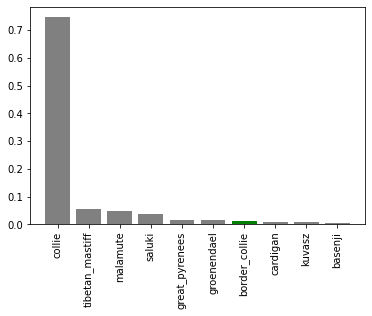

In [ ]:
plot_pred_conf(prediction_probabilites=prediction, labels = val_labels, 
               n = 9)

Now we've got  some function to help us visualize our predictions and evaluate our model, let's check out a few

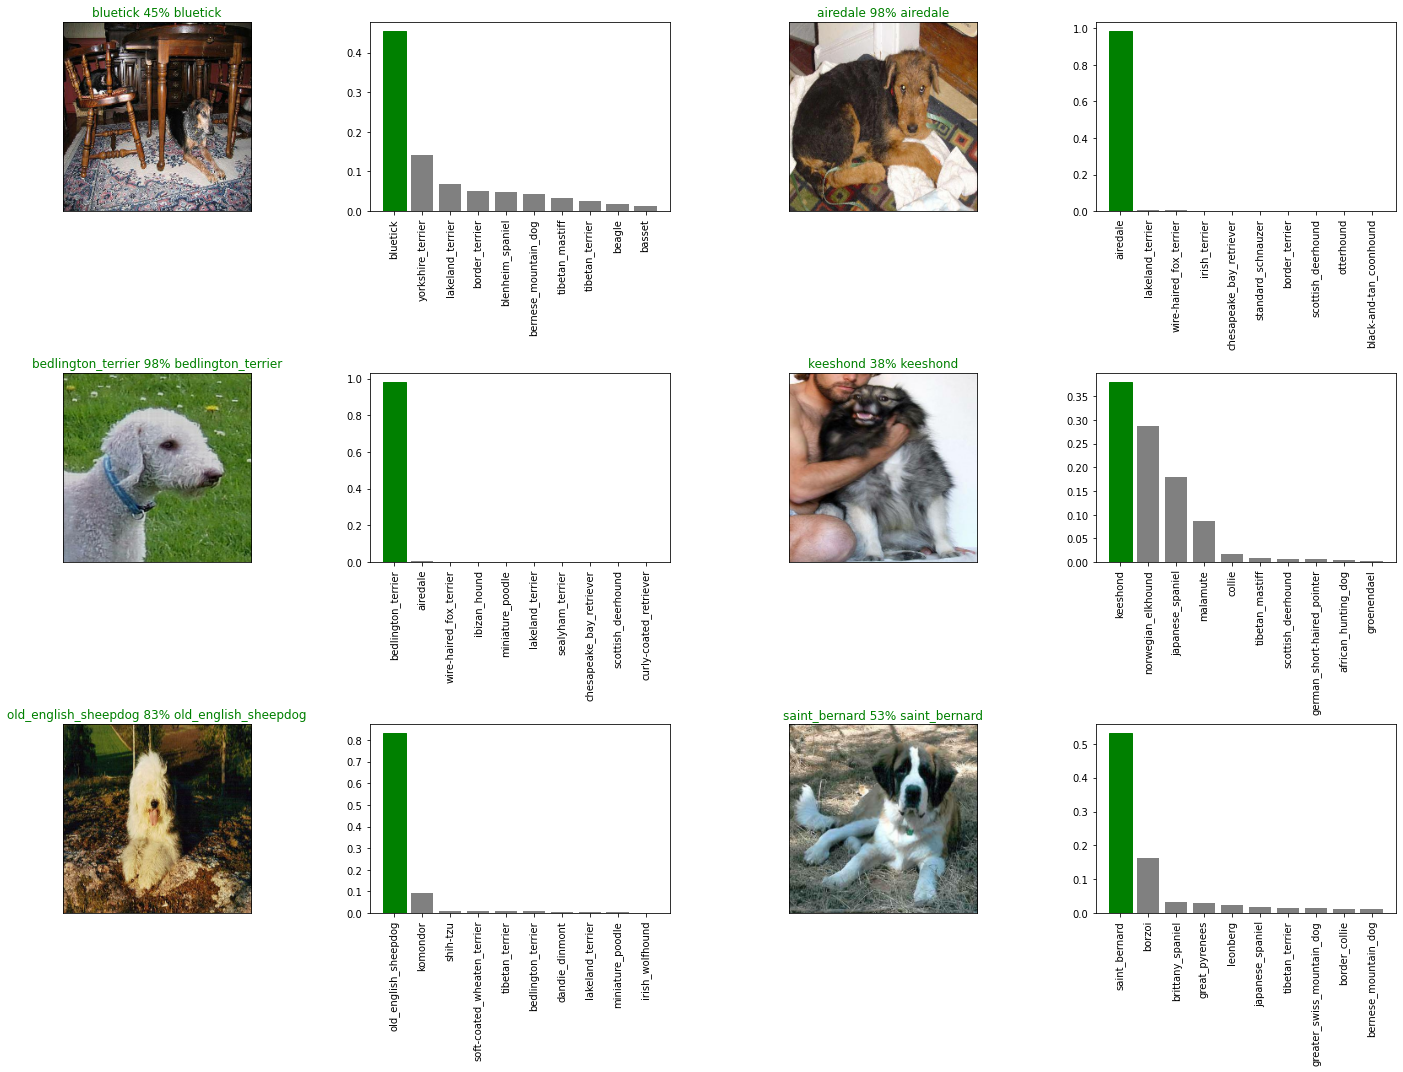

In [ ]:
# Let's check out a few predctions and their different values
i_multiplier = 3
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize = (10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=prediction,
            labels = val_labels,
            images = val_images,
            n = i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilites=prediction, 
                 labels = val_labels,
                 n = i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## Challenge: How would you create confusion matrix using prediction label and true labels

In [ ]:
# create a function to save a model
def save_model(models, suffix = None):
  """
  Saves a given model in a models directory and appends a suffix(string).
  """
  #Create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/Dog Vision/models", 
                          datetime.datetime.now().strftime("%y%m%d-%h%m%s"))
  model_path = modeldir + "-" + suffix + ".h5" # h5 is save format of model
  print(f"savind model to: {model_path}...")
  model.save(model_path)
  return model_path 
  

In [ ]:
#create a function to load a trained model
def load_model(model_path):
  """
  loads a saved model from a specified path
  """
  print(f" Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects={"KerasLayer":hub.KerasLayer })
  return model

Now we've got functions to save and load a trained model, let's make sure they work!

In [ ]:
# save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")

savind model to: drive/MyDrive/Dog Vision/models/230121-Jan011674324565-1000-images-mobilenetv2-Adam.h5...


'drive/MyDrive/Dog Vision/models/230121-Jan011674324565-1000-images-mobilenetv2-Adam.h5'

In [ ]:
# loading the trained model
loading_1000_image_model = load_model("drive/MyDrive/Dog Vision/models/230120-Jan011674210972-1000-images-mobilenetv2-Adam.h5")

 Loading saved model from: drive/MyDrive/Dog Vision/models/230120-Jan011674210972-1000-images-mobilenetv2-Adam.h5


In [ ]:
# Evaluate the saved model
model.evaluate(valid_data)

7/7 [==============================] - 1s 80ms/step - loss: 1.3350 - accuracy: 0.6550


[1.3349871635437012, 0.6549999713897705]

In [ ]:
# Evaluate the loaded data
loading_1000_image_model.evaluate(valid_data)

7/7 [==============================] - 1s 93ms/step - loss: 1.2494 - accuracy: 0.7000


[1.2493832111358643, 0.699999988079071]

### Training a dog model using full dataset

In [ ]:
len(x), len(y)

(10222, 10222)

In [ ]:
#Create a data batch using full dataset
full_data = create_data_batches(x,y)

creating training data batches...


In [ ]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Create a model for full dataset
full_model = create_model()

building model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [ ]:
# Create a full model callbacks
full_model_tensorboard = create_tensorboard_callback()
#No validation set while training full data so we can't monitor validation accouracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=3)

Note:> Running the below shell will take little while (may be up to 30 minutes for first epochs) because the gpu we're using in the runtime has to load all images in the memory.

In [ ]:
#fit the full model to full data
full_model.fit(x=full_data, epochs=NUM_EPOCHS, callbacks=[full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 36s 101ms/step - loss: 1.3385 - accuracy: 0.6770
Epoch 2/100
320/320 [==============================] - 31s 96ms/step - loss: 0.4051 - accuracy: 0.8810
Epoch 3/100
320/320 [==============================] - 31s 96ms/step - loss: 0.2351 - accuracy: 0.9346
Epoch 4/100
320/320 [==============================] - 30s 95ms/step - loss: 0.1543 - accuracy: 0.9636
Epoch 5/100
320/320 [==============================] - 31s 95ms/step - loss: 0.1082 - accuracy: 0.9774
Epoch 6/100
320/320 [==============================] - 31s 95ms/step - loss: 0.0767 - accuracy: 0.9863
Epoch 7/100
320/320 [==============================] - 30s 95ms/step - loss: 0.0596 - accuracy: 0.9896
Epoch 8/100
320/320 [==============================] - 32s 98ms/step - loss: 0.0474 - accuracy: 0.9940
Epoch 9/100
320/320 [==============================] - 30s 94ms/step - loss: 0.0380 - accuracy: 0.9960
Epoch 10/100
320/320 [==============================] - 30s 92ms/step - 

In [ ]:
save_model(full_model, suffix="full data-images-mobilenetv2-Adam")

savind model to: drive/MyDrive/Dog Vision/models/230121-Jan011674325192-full data-images-mobilenetv2-Adam.h5...


'drive/MyDrive/Dog Vision/models/230121-Jan011674325192-full data-images-mobilenetv2-Adam.h5'

In [ ]:
# loading full model
loaded_full_model = load_model("drive/MyDrive/Dog Vision/models/230120-Jan011674213627-full data-images-mobilenetv2-Adam.h5")

 Loading saved model from: drive/MyDrive/Dog Vision/models/230120-Jan011674213627-full data-images-mobilenetv2-Adam.h5


## Making predictions of the test dataset

Since our model has been trained on images in the form of tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckitly we created 'create_data_batches()' earlier which can take a list of filenames as input and convert them into tensor batches.

To make predictions on the test data, we'll:
* Get the test image filenames
* Convert the filenames into test data batches using 'create_data_batches()' and setting the test_data parameter to True (since the test data doesn't have labels).
* Make a predictions array by passing the test batches to the 'predict()' method called on our model

In [ ]:
# Load test image fielnames
test_path = "drive/MyDrive/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/MyDrive/Dog Vision/test/e504cbd0094fc72312087587795be597.jpg',
 'drive/MyDrive/Dog Vision/test/e5c313a35ac162b3b88b50157f6fd309.jpg',
 'drive/MyDrive/Dog Vision/test/dddb2b191e1b1de4867f6f5e81236312.jpg',
 'drive/MyDrive/Dog Vision/test/e6326f6c8ad1e06c0f70546ddfc64067.jpg',
 'drive/MyDrive/Dog Vision/test/e7ce78e874945f182a4f5149aa505b09.jpg',
 'drive/MyDrive/Dog Vision/test/e219af838e1d6a18224eb9b478944778.jpg',
 'drive/MyDrive/Dog Vision/test/dd3eb4338145e614d325a917a35e5a1e.jpg',
 'drive/MyDrive/Dog Vision/test/deb66780609abfef7f5048df02149839.jpg',
 'drive/MyDrive/Dog Vision/test/df5e20faf083ef154fcd716dff396e1d.jpg',
 'drive/MyDrive/Dog Vision/test/e57fded38af2f081403feefb324ed3a9.jpg']

In [ ]:
len(test_filenames)

10357

In [ ]:
# create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

creating test data batches...


In [ ]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

**Note** Calling `predict()` on our full model and passing it the test data batch will take a long time to run(about an -1hr)

In [ ]:
# Make prediction on test data batch using the loaded full model
test_prediction = loaded_full_model.predict(test_data, verbose=1)

324/324 [==============================] - 193s 576ms/step


In [ ]:
# Save predictions (Numpy Array) to csv file (for access later)
np.savetxt("drive/MyDrive/Dog Vision/preds_array.csv", test_prediction, delimiter=",")

In [ ]:
# Load predictions (Numpy array) from .csv file
test_prediction = np.loadtxt("drive/MyDrive/Dog Vision/preds_array.csv", delimiter=",")

In [ ]:
test_prediction[:10]

array([[8.32847669e-04, 2.57234089e-04, 5.98406368e-05, ...,
        8.88569866e-06, 1.57977854e-06, 2.23798235e-03],
       [1.50547494e-04, 1.43398021e-04, 1.24721455e-05, ...,
        1.97172358e-05, 7.94797506e-06, 1.11270310e-05],
       [1.23752789e-05, 4.27009218e-05, 3.95407915e-06, ...,
        2.74321093e-04, 3.39842627e-05, 2.34922161e-04],
       ...,
       [1.86294186e-04, 1.48980436e-03, 3.61796192e-05, ...,
        1.25448889e-04, 7.60092153e-05, 1.59895077e-04],
       [6.25558011e-03, 1.47025846e-03, 7.88975740e-04, ...,
        9.72852577e-04, 1.67885574e-03, 1.22490991e-02],
       [1.49844959e-06, 1.89049490e-04, 2.85047339e-04, ...,
        6.01377904e-01, 2.82878027e-05, 4.49547770e-05]])